In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Data Read
df = pd.read_csv("C:/Employee_attrition/Employee_Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Check Duplicates
duplicates = df[df.duplicated()]
print("Total duplicate rows:",len(duplicates))

Total duplicate rows: 0


In [9]:
# Delete Unwanted Columns
df = df.drop(["EmployeeCount","Over18","StandardHours","EmployeeNumber"], axis = 1)

In [10]:
attr_counts = df['Attrition'].value_counts(normalize=True)

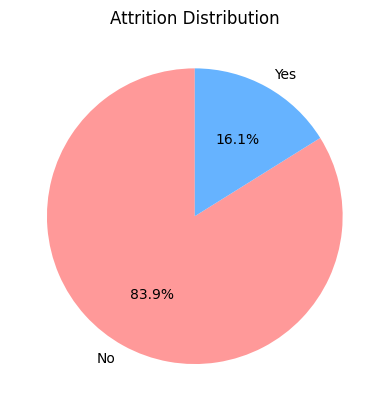

In [11]:
fig, ax = plt.subplots()
ax.pie(attr_counts, labels=attr_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax.set_title("Attrition Distribution")

plt.show()

DATA PRE-PROCESSING


In [12]:
# Convert Datatypes and Encode Target
# convert Attrition to binary target
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [13]:
# convert obvious categoricals to 'category' dtype
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("categorical columns:", cat_cols)
for c in cat_cols:
    df[c] = df[c].astype('category')

categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [14]:
#Identify near-constant / near-zero variance columns
nunique = df.nunique().sort_values()
print(nunique[nunique<=1])   # completely constant
print(nunique[nunique<=2])   # binary or almost binary

Series([], dtype: int64)
Attrition            2
Gender               2
PerformanceRating    2
OverTime             2
dtype: int64


In [15]:
# Numeric summary & outlier detection
num_cols = df.select_dtypes(include=[np.number]).columns.drop('Attrition')  # numeric predictors
display(df[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [16]:
# quick skewness
skews = df[num_cols].skew().sort_values(ascending=False)
print(skews.head(10))

YearsSinceLastPromotion    1.984290
PerformanceRating          1.921883
YearsAtCompany             1.764529
MonthlyIncome              1.369817
TotalWorkingYears          1.117172
NumCompaniesWorked         1.026471
JobLevel                   1.025401
StockOptionLevel           0.968980
DistanceFromHome           0.958118
YearsInCurrentRole         0.917363
dtype: float64


In [17]:
# Categorical processing choices
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [18]:
# Apply Encoding
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['OverTime'] = df['OverTime'].map({'Yes':1,'No':0})

In [19]:
df = pd.get_dummies(df, 
                    columns=['BusinessTravel','Department','EducationField',
                             'JobRole','MaritalStatus'],
                    drop_first=True)  # drop_first avoids dummy trap

In [20]:
print(df.head())
print("Remaining object columns:", df.select_dtypes(include=['object']).columns.tolist())

   Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction Gender  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2      0          94               3         2  ...   
1                        3      1          61               2         2  ...   
2                        4      1          92               2         1  ...   
3                        4      0          56               3         1  ...   
4                        1      1          40               3         1  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                    False                          False            False

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
# separate columns
num_cols = df.select_dtypes(include=[np.number]).columns.drop('Attrition').tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

In [23]:
# small safety: remove target from num_cols if present
if 'Attrition' in num_cols:
    num_cols.remove('Attrition')

# pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # or fill_value='Missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [24]:
# Remove multicollinearity / do VIF check
# calculate correlation and drop one of any pair with corr > 0.9
corrmat = df[num_cols].corr().abs()
upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.9)]
print("to drop due to high corr:", to_drop_corr)

to drop due to high corr: ['MonthlyIncome']


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[num_cols].fillna(df[num_cols].median())
vif = pd.DataFrame({'feature':X.columns, 'VIF':[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})
display(vif.sort_values('VIF', ascending=False).head(10))

,feature,VIF
13,PerformanceRating,114.724181
7,JobLevel,49.657767
12,PercentSalaryHike,41.829000
0,Age,33.155944
9,MonthlyIncome,31.318636
18,WorkLifeBalance,15.310855
6,JobInvolvement,14.885028
16,TotalWorkingYears,14.336803
5,HourlyRate,11.107000
19,YearsAtCompany,10.559993


Feature Engineering


In [26]:
df['TenureBucket'] = pd.cut(df['YearsAtCompany'],
                            bins=[-1,1,3,7,15,40],
                            labels=['<1 yr','1-3 yrs','4-7 yrs','8-15 yrs','15+ yrs'])

In [27]:
df['NoPromotionRecently'] = (df['YearsSinceLastPromotion'] > 5).astype(int)

In [28]:
df['YearsBeforeManager'] = df['YearsAtCompany'] - df['YearsWithCurrManager']

In [29]:
df['OvertimeLowPay'] = ((df['OverTime']==1) & (df['MonthlyIncome']<df['MonthlyIncome'].median())).astype(int)

In [30]:
df = pd.get_dummies(df, columns=['TenureBucket'], drop_first=True)

In [31]:
print(df.shape)
print(df.head())
print(df.dtypes.value_counts())

(1470, 52)
   Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction Gender  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2      0          94               3         2  ...   
1                        3      1          61               2         2  ...   
2                        4      1          92               2         1  ...   
3                        4      0          56               3         1  ...   
4                        1      1          40               3         1  ...   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                         False                  False       

Train/Test Split & Class Imbalance

In [32]:
# predictors = everything except Attrition
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [33]:
class_counts = y.value_counts()
print(class_counts)

Attrition
0    1233
1     237
Name: count, dtype: int64


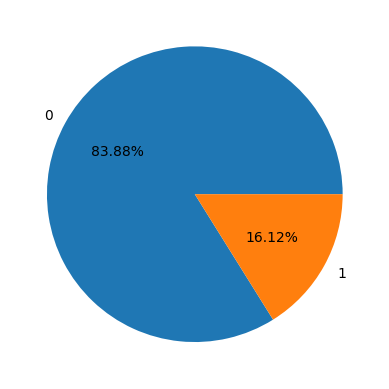

In [34]:
plt.pie(
    class_counts.values, labels = class_counts.index, autopct= "%1.2f%%"
    
)

plt.show()

In [35]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 80% train, 20% test
    stratify=y,            # keeps class distribution same
    random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Attrition rate in training set:")
print(y_train.value_counts(normalize=True))

Train shape: (1176, 51) (1176,)
Test shape: (294, 51) (294,)
Attrition rate in training set:
Attrition
0    0.838435
1    0.161565
Name: proportion, dtype: float64


In [36]:
# Check class imbalance
print("Attrition ratio overall:")
print(y.value_counts())
print(y.value_counts(normalize=True))

Attrition ratio overall:
Attrition
0    1233
1     237
Name: count, dtype: int64
Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [37]:
# Handle imbalance
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

Baseline Model + Pipeline

In [38]:
# Imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Identify column types
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['bool','category']).columns.tolist()

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

Numeric columns: 26
Categorical columns: 25


In [40]:
# Preprocessing transformers
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [41]:
# Build baseline pipelines
log_reg_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

In [42]:
rf_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

In [43]:
# Train & evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("🔹 Logistic Regression Results:")
evaluate(log_reg_pipe, X_train, y_train, X_test, y_test)

print("\n🔹 Random Forest Results:")
evaluate(rf_pipe, X_train, y_train, X_test, y_test)

🔹 Logistic Regression Results:
Accuracy: 0.7789115646258503
Precision: 0.3953488372093023
Recall: 0.723404255319149
F1: 0.5112781954887218
ROC-AUC: 0.8209148074769576
Confusion Matrix:
 [[195  52]
 [ 13  34]]

🔹 Random Forest Results:
Accuracy: 0.8401360544217688
Precision: 0.5
Recall: 0.0851063829787234
F1: 0.14545454545454545
ROC-AUC: 0.764406925661125
Confusion Matrix:
 [[243   4]
 [ 43   4]]


Model Tuning & Selection

In [44]:
# imports
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [45]:
# Define parameter grid for Random Forest
param_dist = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2'],
    'clf__class_weight': ['balanced', 'balanced_subsample']
}

In [46]:
# RandomizedSearchCV on Random Forest pipeline
rf_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

rs_rf = RandomizedSearchCV(
    rf_pipe,
    param_distributions=param_dist,
    n_iter=20,          # number of random combinations to try
    scoring='recall',   # optimize for catching leavers
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rs_rf.fit(X_train, y_train)

print("Best Params:", rs_rf.best_params_)
print("Best Recall (CV):", rs_rf.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'clf__n_estimators': 100, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 4, 'clf__max_features': 'sqrt', 'clf__max_depth': 5, 'clf__class_weight': 'balanced'}
Best Recall (CV): 0.47368421052631576


In [47]:
# Evaluate best Random Forest
best_rf = rs_rf.best_estimator_

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       247
           1       0.43      0.55      0.48        47

    accuracy                           0.81       294
   macro avg       0.67      0.71      0.68       294
weighted avg       0.83      0.81      0.82       294

ROC-AUC: 0.7883538633818589


In [48]:
! pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
# Try XGBoost
from xgboost import XGBClassifier

xgb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('clf', XGBClassifier(
        scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1]),  # handles imbalance
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

xgb_pipe.fit(X_train, y_train)
y_pred = xgb_pipe.predict(X_test)
y_prob = xgb_pipe.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.50      0.30      0.37        47

    accuracy                           0.84       294
   macro avg       0.69      0.62      0.64       294
weighted avg       0.82      0.84      0.82       294

ROC-AUC: 0.7496769747609613


Model Evaluation & Interpretation


📊 Random Forest Results
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       247
           1       0.43      0.55      0.48        47

    accuracy                           0.81       294
   macro avg       0.67      0.71      0.68       294
weighted avg       0.83      0.81      0.82       294

ROC-AUC: 0.7883538633818589


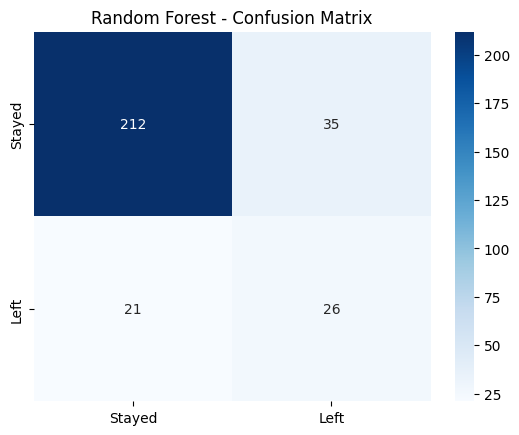

In [50]:
# Evaluate metrics on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    print(f"\n📊 {name} Results")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Stayed','Left'],
                yticklabels=['Stayed','Left'])
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Example:
evaluate_model("Random Forest", best_rf, X_test, y_test)

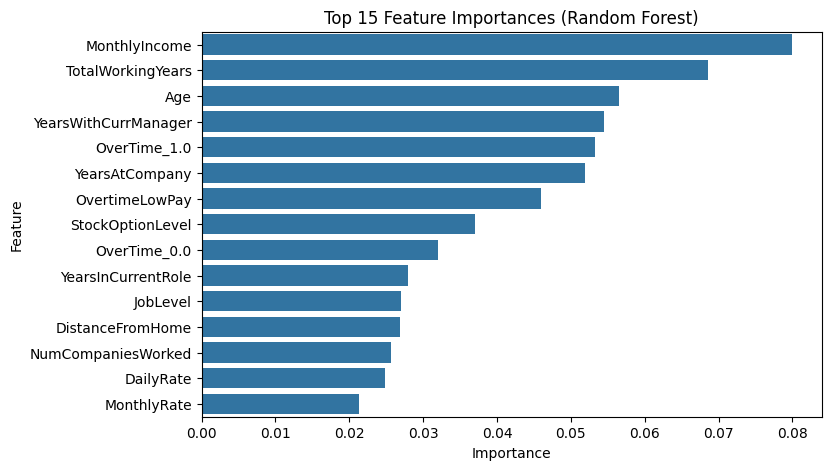

In [51]:
# Feature importance (for tree-based models)
import numpy as np

# Get feature names from preprocessing
num_features = num_cols
cat_features = best_rf.named_steps['preprocess'] \
                     .named_transformers_['cat'] \
                     .named_steps['onehot'] \
                     .get_feature_names_out(cat_cols)
all_features = np.concatenate([num_features, cat_features])

# Extract importance
importances = best_rf.named_steps['clf'].feature_importances_
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

Save Model & Outputs

In [52]:
import os

# Create 'models' folder if it doesn't exist
os.makedirs("models", exist_ok=True)

In [53]:
# Save your best model
! pip install joblib


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import joblib

joblib.dump(best_rf, "models/attrition_model.pkl")
print("Model saved to models/attrition_model.pkl")

Model saved to models/attrition_model.pkl


In [55]:
print(os.listdir("models"))

['attrition_model.pkl', 'performance_model.pkl', 'preprocessor.pkl', 'promotion_model.pkl', 'satisfaction_model.pkl']


In [56]:
model = joblib.load("models/attrition_model.pkl")
print("Model loaded successfully!")

Model loaded successfully!


In [57]:
# Save preprocessor separately
preprocessor = best_rf.named_steps['preprocess']
joblib.dump(preprocessor, "models/preprocessor.pkl")

['models/preprocessor.pkl']

In [58]:
import os

# Create 'reports' folder if it doesn't exist
os.makedirs("reports", exist_ok=True)

In [59]:
# Export predictions (top at-risk employees)
# Get probabilities
preds = best_rf.predict_proba(X_test)[:,1]

# Add to test data
results = X_test.copy()
results['Attrition_Prob'] = preds
results['Actual'] = y_test.values

# Sort by risk
top_risk = results.sort_values('Attrition_Prob', ascending=False).head(20)

# Save to CSV
top_risk.to_csv("reports/high_risk_employees.csv", index=False)
print("Saved top 20 at-risk employees to reports/high_risk_employees.csv")

Saved top 20 at-risk employees to reports/high_risk_employees.csv


In [60]:
# Save evaluation metrics (for report)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics = {
    "accuracy": accuracy_score(y_test, best_rf.predict(X_test)),
    "precision": precision_score(y_test, best_rf.predict(X_test)),
    "recall": recall_score(y_test, best_rf.predict(X_test)),
    "f1": f1_score(y_test, best_rf.predict(X_test)),
    "roc_auc": roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])
}

import json
with open("reports/model_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Saved model metrics to reports/model_metrics.json")

Saved model metrics to reports/model_metrics.json


In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Detect numeric & categorical columns directly from df
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()

# Remove targets from both lists
for target in ['Attrition','PerformanceRating','YearsSinceLastPromotion','JobSatisfaction']:
    if target in num_cols: num_cols.remove(target)
    if target in cat_cols: cat_cols.remove(target)

# Define preprocessors
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib, os

# -------------------------
# 0. Setup
# -------------------------
os.makedirs("models", exist_ok=True)

# Define target columns
targets = {
    "attrition": "Attrition",
    "performance": "PerformanceRating",
    "promotion": "YearsSinceLastPromotion",
    "satisfaction": "JobSatisfaction"
}

# -------------------------
# 1. Build fresh preprocessor
# -------------------------
# numeric + categorical features from df
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()

# remove target columns if they slipped in
for t in targets.values():
    if t in num_cols: num_cols.remove(t)
    if t in cat_cols: cat_cols.remove(t)

num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

print("✅ Preprocessor built with:")
print("Numeric:", num_cols[:10], "... total", len(num_cols))
print("Categorical:", cat_cols[:10], "... total", len(cat_cols))

# -------------------------
# 2. Train + save models
# -------------------------
for key, target_col in targets.items():
    # Define X and y
    X = df.drop(columns=[target_col])
    if key == "promotion":
        y = (df[target_col] > 3).astype(int)  # convert promotion to binary
    else:
        y = df[target_col]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y if len(y.unique()) > 1 else None
    )
    
    # Build pipeline
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('clf', RandomForestClassifier(random_state=42))
    ])
    
    # Fit model
    pipe.fit(X_train, y_train)
    
    # Save model
    model_path = f"models/{key}_model.pkl"
    joblib.dump(pipe, model_path)
    print(f"✅ Saved {key.capitalize()} model → {model_path}")

✅ Preprocessor built with:
Numeric: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate'] ... total 23
Categorical: ['Gender', 'OverTime', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other'] ... total 25
✅ Saved Attrition model → models/attrition_model.pkl
✅ Saved Performance model → models/performance_model.pkl
✅ Saved Promotion model → models/promotion_model.pkl
✅ Saved Satisfaction model → models/satisfaction_model.pkl


Save Data as a CSV File

In [63]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,NoPromotionRecently,YearsBeforeManager,OvertimeLowPay,TenureBucket_1-3 yrs,TenureBucket_4-7 yrs,TenureBucket_8-15 yrs,TenureBucket_15+ yrs
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,True,0,1,0,False,True,False,False
1,49,0,279,8,1,3,1,61,2,2,...,False,True,False,0,3,0,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,False,False,True,0,0,1,False,False,False,False
3,33,0,1392,3,4,4,0,56,3,1,...,False,True,False,0,8,1,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,False,True,False,0,0,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,...,False,True,False,0,2,0,False,True,False,False
1466,39,0,613,6,1,4,1,42,2,3,...,False,True,False,0,0,0,False,True,False,False
1467,27,0,155,4,3,2,1,87,4,2,...,False,True,False,0,3,0,False,True,False,False
1468,49,0,1023,2,3,4,1,63,2,2,...,False,True,False,0,1,0,False,False,True,False


In [64]:
df = pd.DataFrame(df)

In [65]:
df.to_csv("cleaned_data.csv",index=False)